In [1]:
%matplotlib inline
%pylab inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('parallel_merge_max.csv', names=['k','node','number_influenced','s'])

In [3]:
df

,k,node,number_influenced,s
0,0,24587,1,0
1,0,24587,2,1
2,0,24587,26,2
3,1,24587,40,2
4,0,24587,145,3
5,1,24587,197,3
6,0,24587,730,4
7,1,24587,913,4
8,0,24587,2028,5
9,1,24587,2353,5


In [4]:
df.groupby(['node','s'], sort=False)['k'].max()
idx = df.groupby(['node','s'])['k'].transform(max) == df['k']

In [5]:
df_sub_sample = df[idx][['node','number_influenced','s']]

In [6]:
df_sub_sample = df_sub_sample.reset_index(drop=True)
df_sub_sample.head()

,node,number_influenced,s
0,24587,1,0
1,24587,2,1
2,24587,40,2
3,24587,197,3
4,24587,913,4


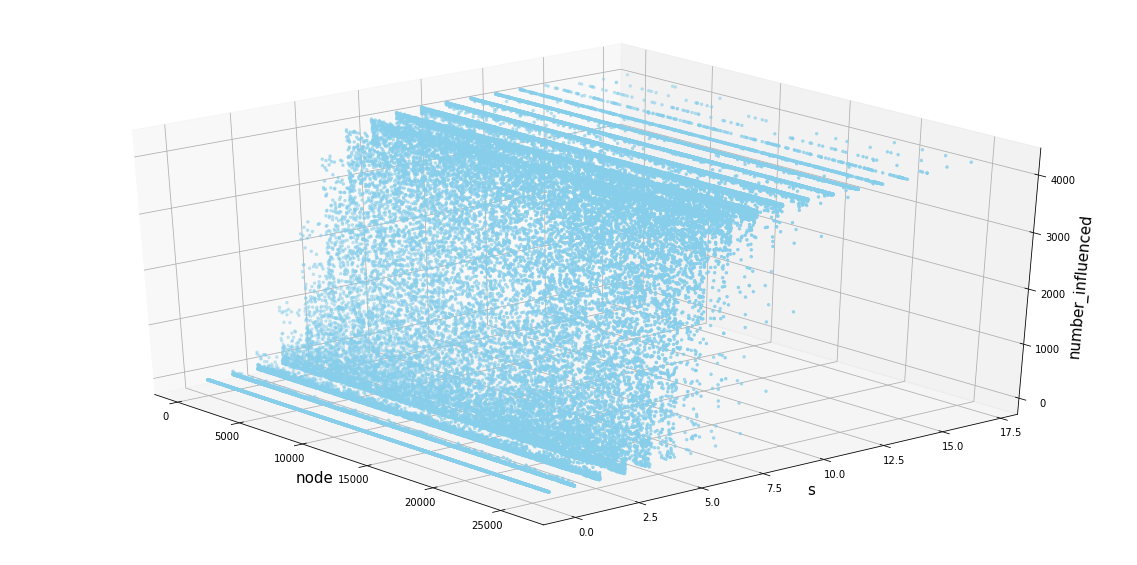

In [7]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_sub_sample['node'],
           df_sub_sample['s'],
           df_sub_sample['number_influenced'],
           cmap=plt.cm.viridis,
           c='skyblue', s=6)

ax.set_xlabel('node', fontsize=15)
ax.set_ylabel('s', fontsize=15)
ax.set_zlabel('number_influenced', fontsize=15)

ax.view_init(30, -40)

plt.show()

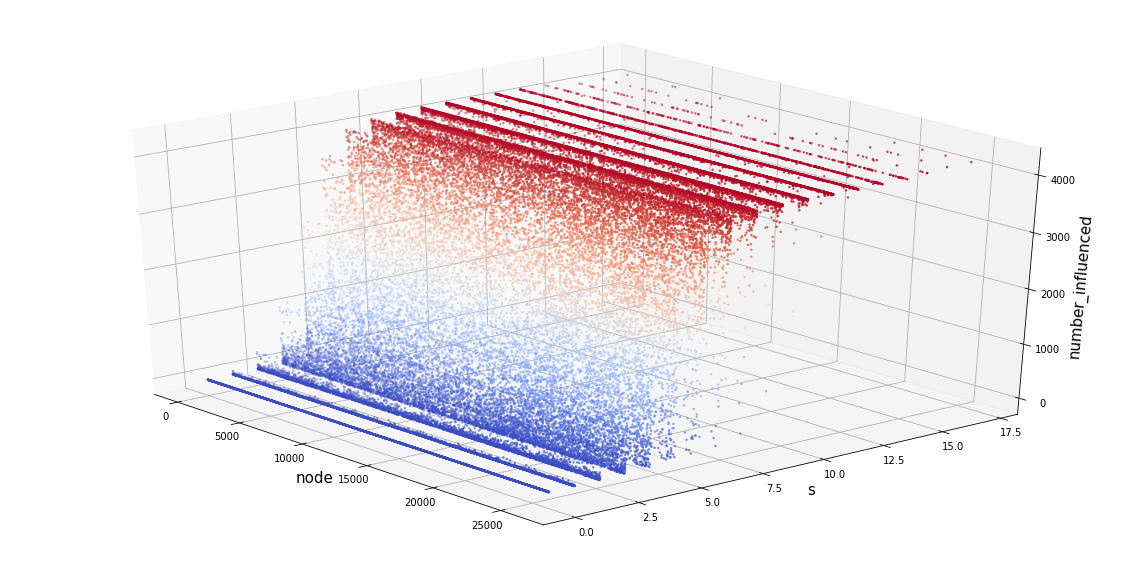

In [8]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_sub_sample['node'],
           df_sub_sample['s'],
           df_sub_sample['number_influenced'],
           linewidth=0, s=6, c=df_sub_sample['number_influenced'],  cmap=cm.coolwarm)

ax.set_xlabel('node', fontsize=15)
ax.set_ylabel('s', fontsize=15)
ax.set_zlabel('number_influenced', fontsize=15)

ax.view_init(30, -40)

plt.show()

In [9]:
count_s = df_sub_sample[['s','node']].groupby(['s'], as_index=False).count().sort_values(by=['s'])
count_s

,s,node
0,0,4158
1,1,4158
2,2,4158
3,3,4158
4,4,4158
5,5,4158
6,6,4158
7,7,4158
8,8,4158
9,9,4158


In [10]:
y_second_label = []
y_second_label.append('')
for r in count_s['node']:
    y_second_label.append('n = {}'.format(r))
    
len(y_second_label)

19

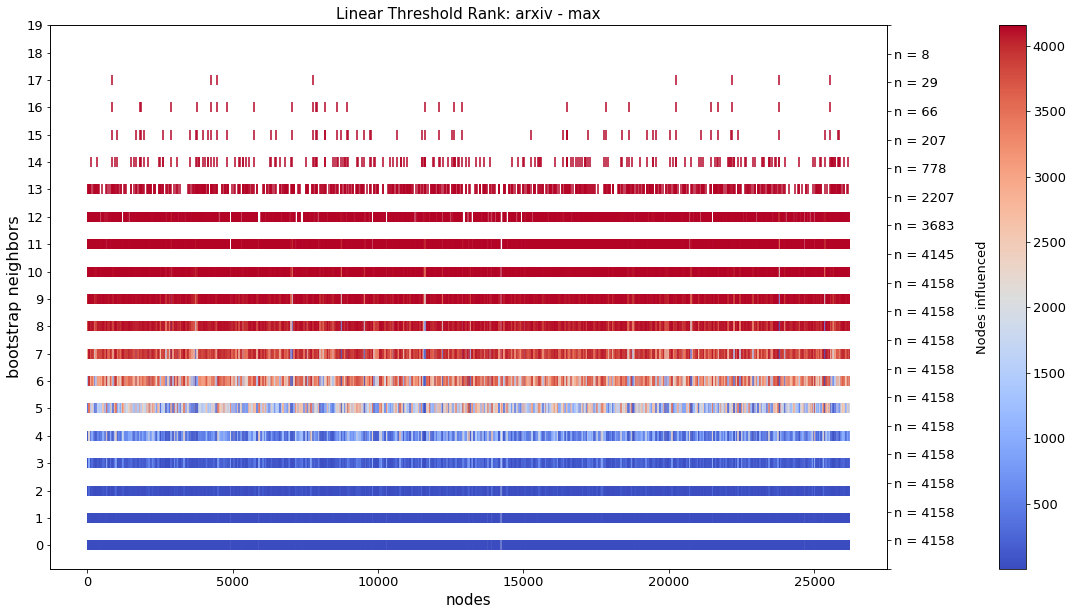

In [11]:
import matplotlib.pyplot as plt
from numpy.random import rand
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['xtick.labelsize']=13
plt.rcParams['ytick.labelsize']=13

fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(df_sub_sample['node'], df_sub_sample['s'],
           c=df_sub_sample['number_influenced'],
           cmap=cm.coolwarm, s=100, marker='|')

yint = range(0, 20)
matplotlib.pyplot.yticks(yint)

ax.set_xlabel('nodes', fontsize=15)
ax.set_ylabel('bootstrap neighbors', fontsize=16)


plt.title('Linear Threshold Rank: arxiv - max', fontsize=15)


cbar = plt.colorbar(sc, pad=0.1)
cbar.ax.set_ylabel('Nodes influenced', rotation=90,  labelpad=-90, fontsize=13)


ax2 = ax.twinx()
ax2.set_yticks(range(0, 20))
ax2.set_yticklabels(y_second_label)


plt.show()